In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import keras_tuner as kt
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

In [36]:
df=pd.read_csv("D:\College\Waste\heart.csv")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [38]:
df.shape

(303, 14)

In [39]:
df= df.fillna(df.mean())

In [40]:
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe(df, label_columns):
    # Make a copy of the original DataFrame
    normalized_df = df.copy()
    
    # Identify numerical columns for normalization
    numerical_columns = df.select_dtypes(include=['number']).columns
    
    # Exclude the label columns from normalization
    numerical_columns = [col for col in numerical_columns if col not in label_columns]
    
    # Initialize a MinMaxScaler for normalization
    scaler = MinMaxScaler()
    
    # Normalize the numerical columns
    normalized_df[numerical_columns] = scaler.fit_transform(normalized_df[numerical_columns])
    
    return normalized_df

In [41]:
df1 = normalize_dataframe(df, label_columns=['label'])

In [42]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [43]:
df1['label']=df1['output']

In [44]:
df1['label'].value_counts()

label
1.0    165
0.0    138
Name: count, dtype: int64

In [45]:
df1.drop(['output'],axis=1,inplace=True)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df1.iloc[:, :-1], df1['label'], test_size=0.1, random_state=42)

In [47]:
x_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
284,0.666667,1.0,0.0,0.433962,0.184932,0.0,0.0,0.511450,1.0,0.306452,1.0,0.25,1.000000
198,0.687500,1.0,0.0,0.245283,0.321918,0.0,0.5,0.213740,1.0,0.290323,0.5,0.50,1.000000
42,0.333333,1.0,0.0,0.094340,0.187215,0.0,0.0,0.587786,1.0,0.483871,0.5,0.00,0.666667
17,0.770833,0.0,1.0,0.528302,0.228311,0.0,0.5,0.328244,0.0,0.419355,0.0,0.00,0.666667
168,0.708333,1.0,0.0,0.339623,0.292237,0.0,0.0,0.580153,0.0,0.225806,0.5,0.25,1.000000


In [48]:
y_train.head()

284    0.0
198    0.0
42     1.0
17     1.0
168    0.0
Name: label, dtype: float64

In [49]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 284 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       272 non-null    float64
 1   sex       272 non-null    float64
 2   cp        272 non-null    float64
 3   trtbps    272 non-null    float64
 4   chol      272 non-null    float64
 5   fbs       272 non-null    float64
 6   restecg   272 non-null    float64
 7   thalachh  272 non-null    float64
 8   exng      272 non-null    float64
 9   oldpeak   272 non-null    float64
 10  slp       272 non-null    float64
 11  caa       272 non-null    float64
 12  thall     272 non-null    float64
dtypes: float64(13)
memory usage: 29.8 KB


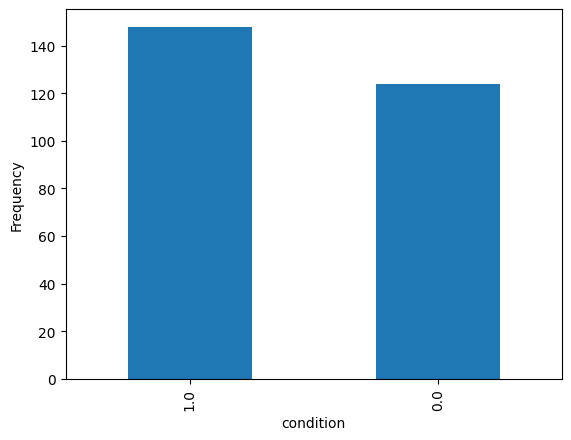

In [50]:
category_counts = y_train.value_counts()
category_counts.plot(kind='bar')
plt.xlabel('condition')
plt.ylabel('Frequency')

plt.show()

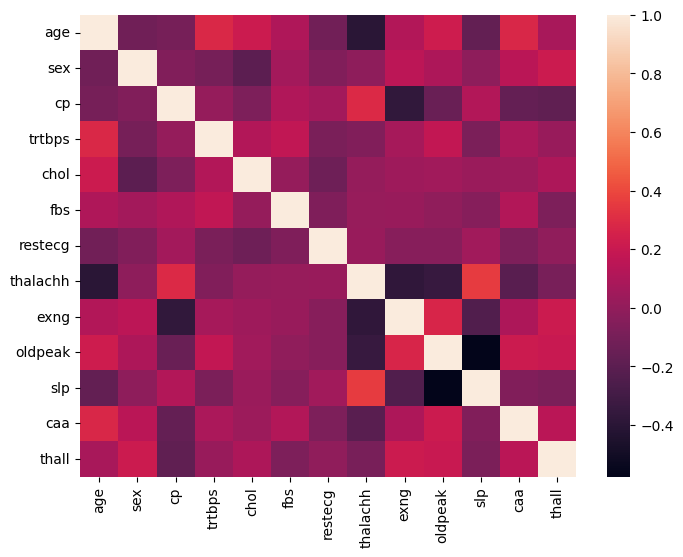

In [51]:
numerical_columns = x_train.select_dtypes(include=['number']).columns
corr = x_train[numerical_columns].corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr, annot=False)
plt.show()

In [52]:
num_classes = 1

model = Sequential()
model.add(Dense(128, activation='sigmoid', input_dim=13))
model.add(Dense(512, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid', kernel_initializer="normal"))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    return lr * 0.95  # Adjust the factor as needed

# Training
h = model.fit(x_train, y_train, epochs=1000, batch_size=100,verbose=0 ,
              callbacks=[LearningRateScheduler(lr_scheduler)])
nn_prediction = (model.predict(x_test) > 0.5).astype("int32") 
print(classification_report(y_test,nn_prediction))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1792      
                                                                 
 dense_25 (Dense)            (None, 512)               66048     
                                                                 
 batch_normalization_8 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 1024)              525312    
                                                                 
 batch_normalization_9 (Bat  (None, 1024)              4096      
 chNormalization)                                     

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the parameter grid for the grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, refit=True, verbose=0, cv=5, scoring=make_scorer(accuracy_score))

# Fit the grid search to the data
grid.fit(x_train, y_train)

# Print the best parameters found by the grid search
print(grid.best_params_)

# Use the best estimator found by the grid search to make predictions on the test set
y_pred = grid.best_estimator_.predict(x_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8064516129032258
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        14
         1.0       0.82      0.82      0.82        17

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Initialize a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(RandomForestClassifier(max_features='sqrt', random_state=42), param_grid, refit=True, verbose=0, cv=5, scoring=make_scorer(accuracy_score))

# Fit the grid search to the data
grid.fit(x_train, y_train)

# Print the best parameters found by the grid search
print(grid.best_params_)

# Use the best estimator found by the grid search to make predictions on the test set
y_pred = grid.best_estimator_.predict(x_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500}
Accuracy: 0.8064516129032258
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77        14
         1.0       0.79      0.88      0.83        17

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.80        31



In [55]:
logistic_model = LogisticRegression( random_state=42)
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.7741935483870968
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        14
         1.0       0.81      0.76      0.79        17

    accuracy                           0.77        31
   macro avg       0.77      0.78      0.77        31
weighted avg       0.78      0.77      0.77        31



In [56]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.7419354838709677
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75        14
         1.0       0.85      0.65      0.73        17

    accuracy                           0.74        31
   macro avg       0.76      0.75      0.74        31
weighted avg       0.77      0.74      0.74        31



In [57]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.7741935483870968
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        14
         1.0       0.81      0.76      0.79        17

    accuracy                           0.77        31
   macro avg       0.77      0.78      0.77        31
weighted avg       0.78      0.77      0.77        31



In [58]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.7741935483870968
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        14
         1.0       0.81      0.76      0.79        17

    accuracy                           0.77        31
   macro avg       0.77      0.78      0.77        31
weighted avg       0.78      0.77      0.77        31



In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the parameter grid for the grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}

# Initialize a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=0, cv=5, scoring=make_scorer(accuracy_score))

# Fit the grid search to the data
grid.fit(x_train, y_train)


# Use the best estimator found by the grid search to make predictions on the test set
y_pred = grid.best_estimator_.predict(x_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8387096774193549
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.81        14
         1.0       0.83      0.88      0.86        17

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31

